<a href="https://colab.research.google.com/github/Khomiakov7706/SKAB/blob/master/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D0%B2%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%82_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Статистический анализ временных рядов

## Вариант 16

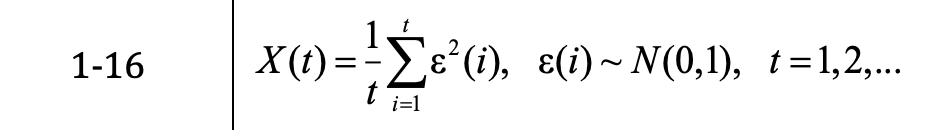

#Введение и теория

![image.png](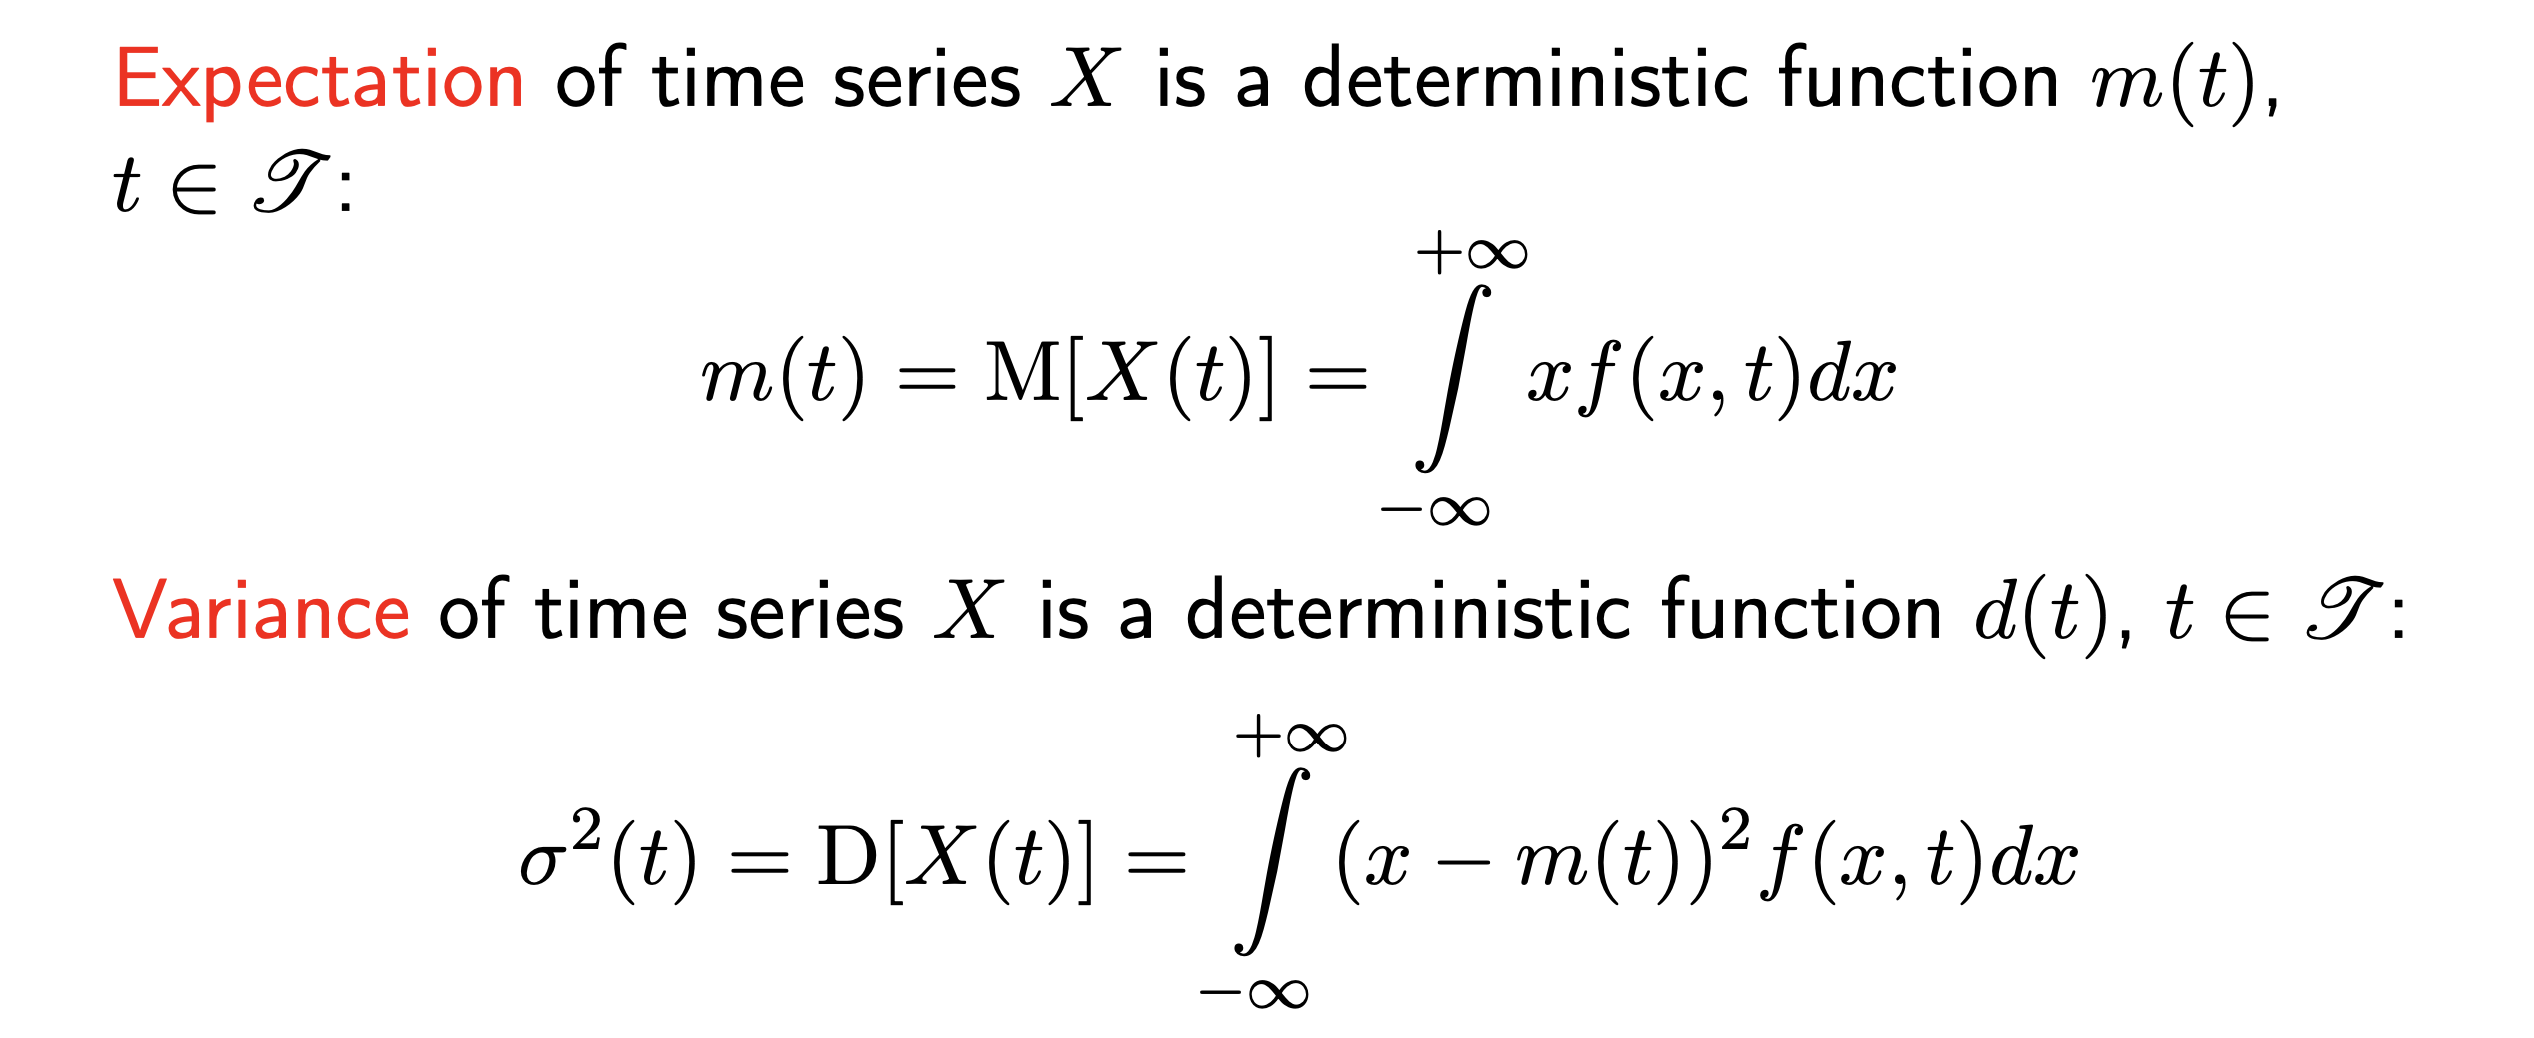
)


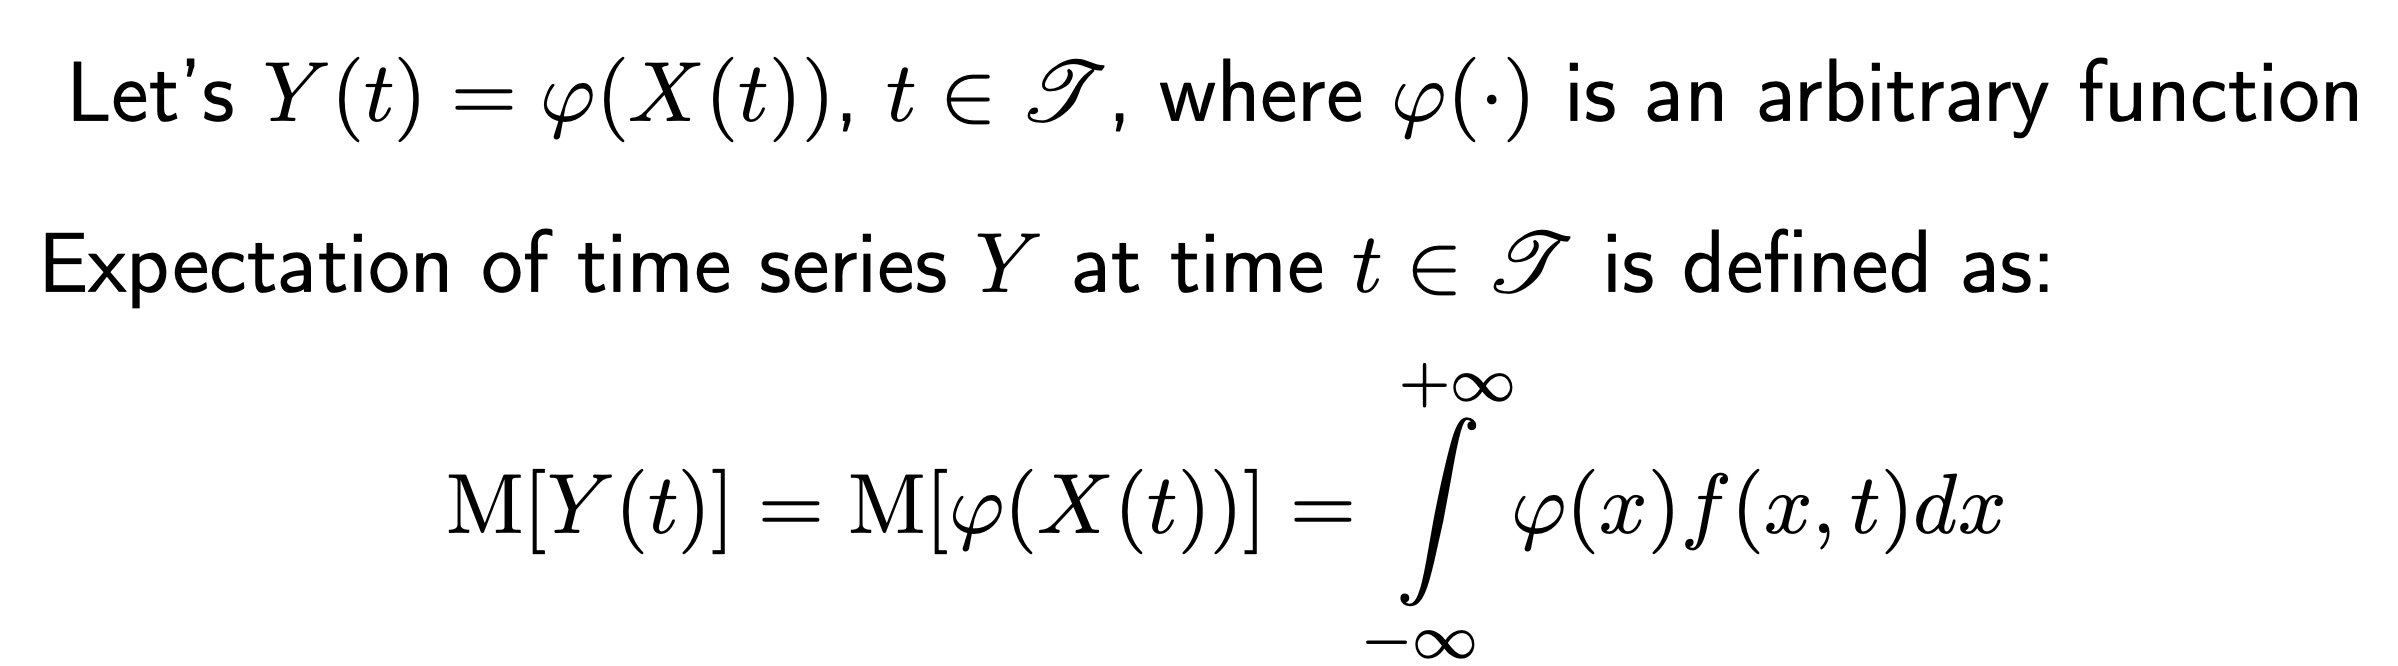

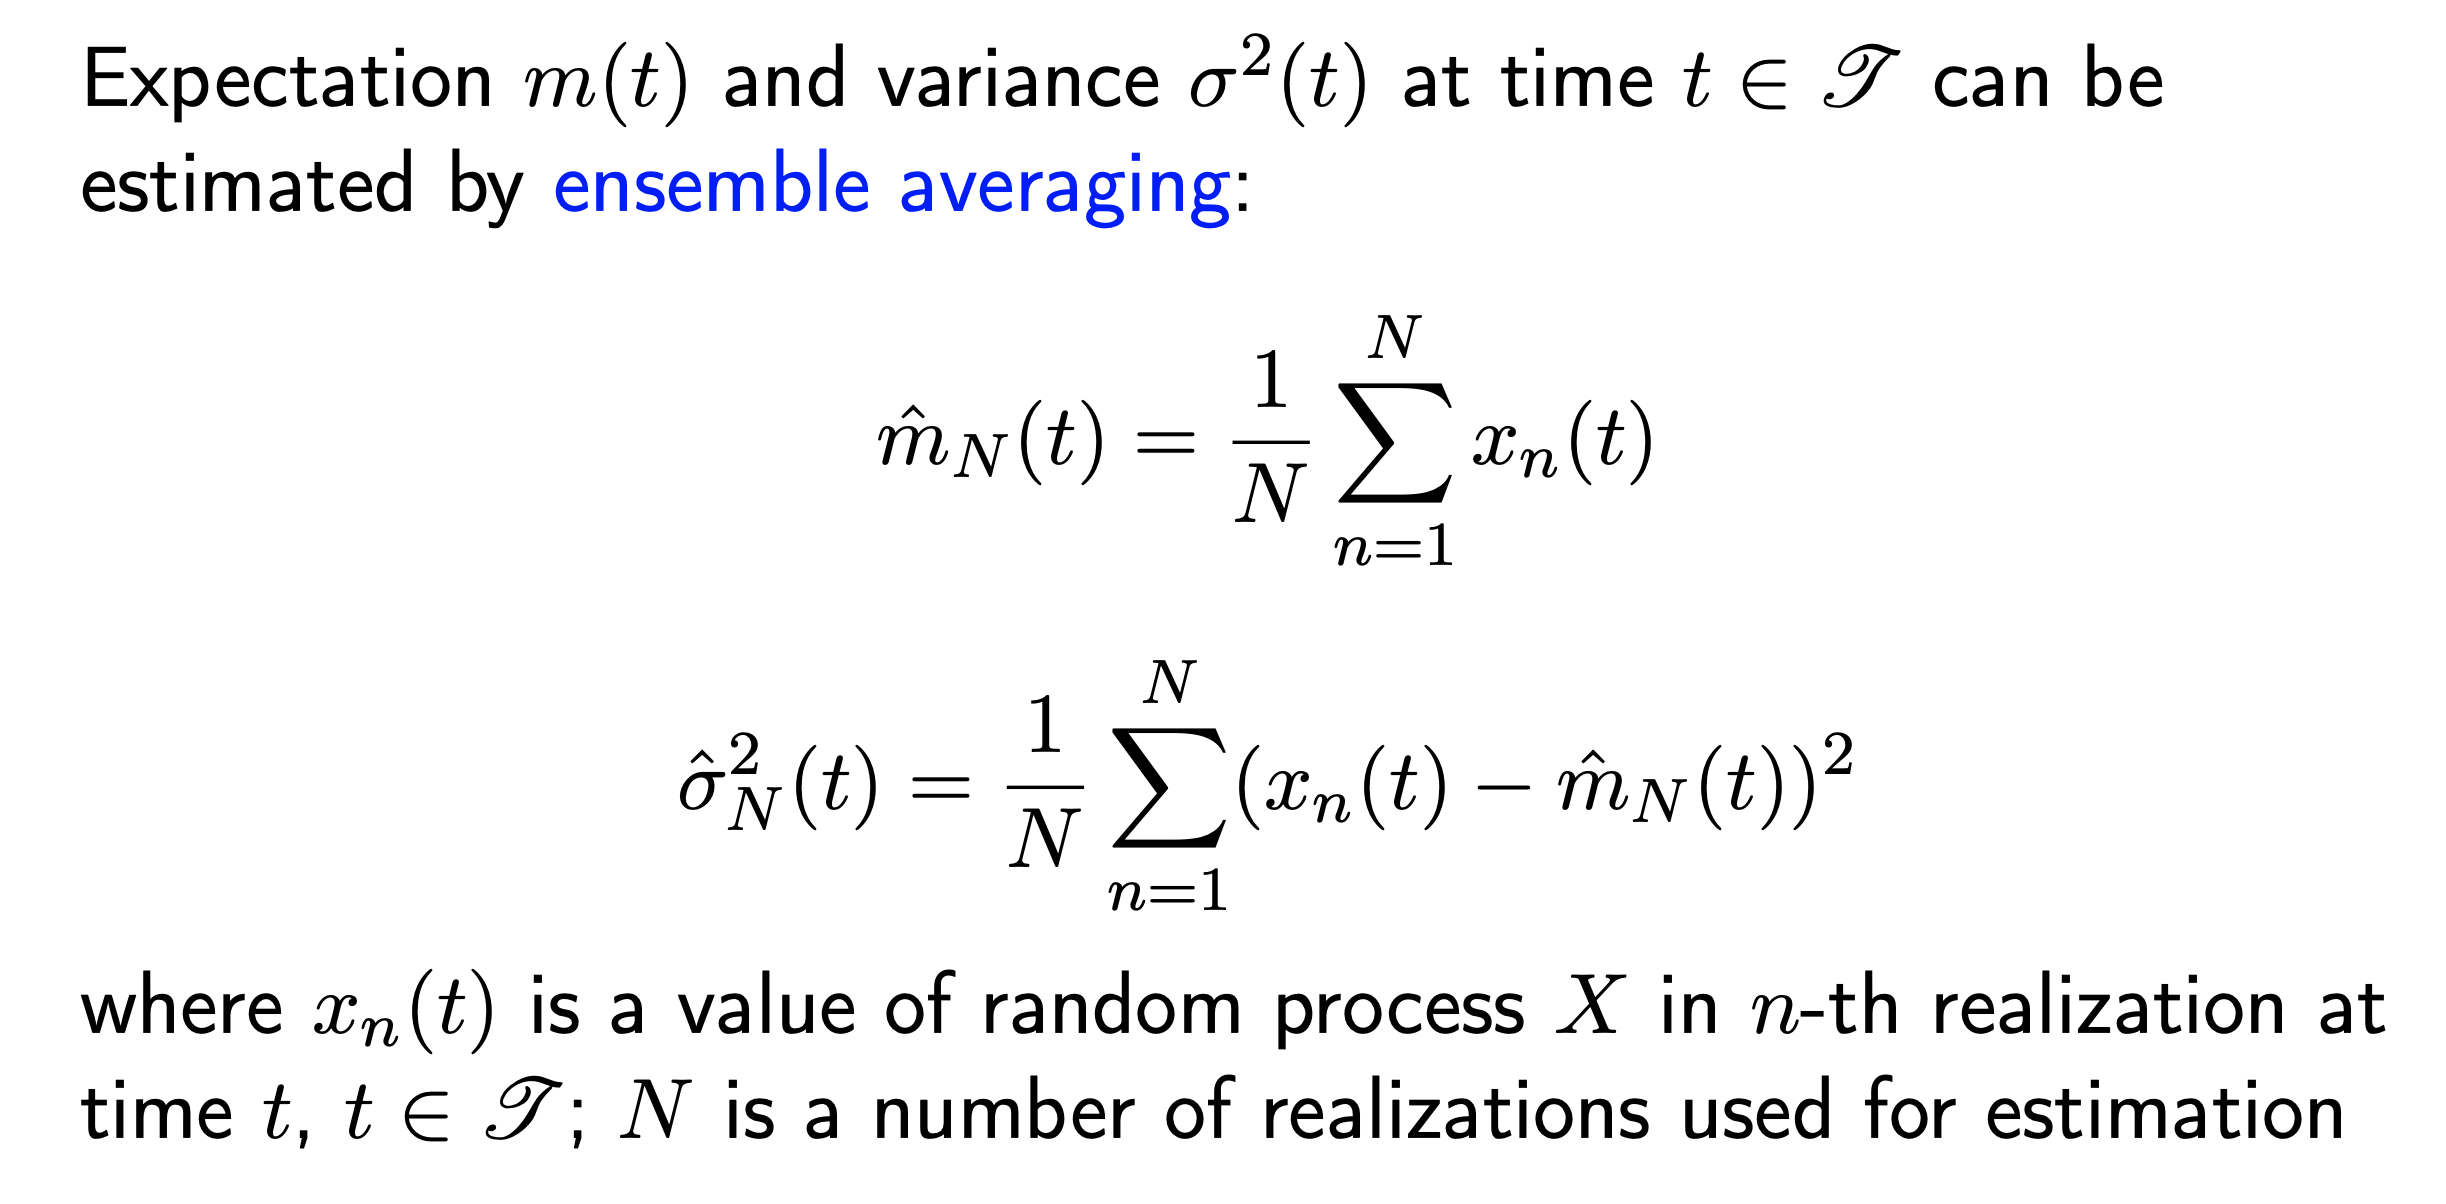

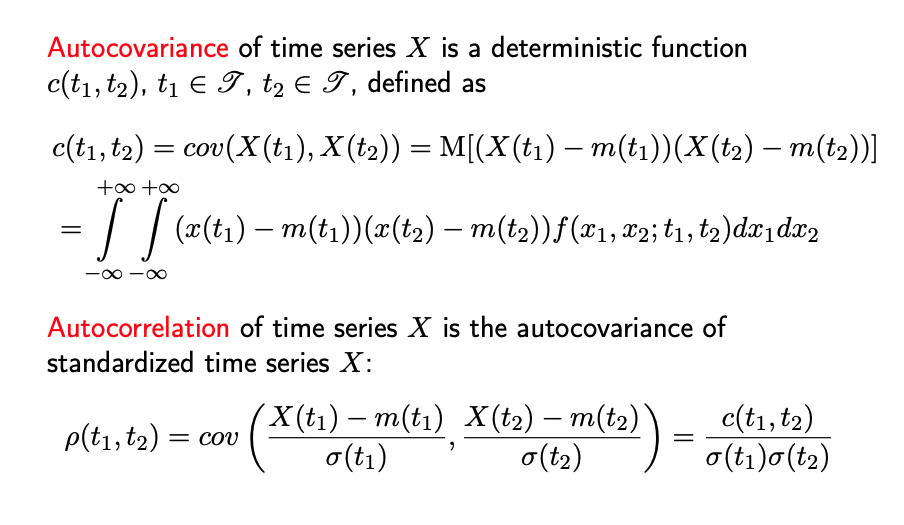

## 1.2.	Записать выражения для математического ожидания\\, дисперсии, автоковариационной функции и автокорреляционной функции процесса.

## 1.3.	Является ли процесс слабо стационарным?

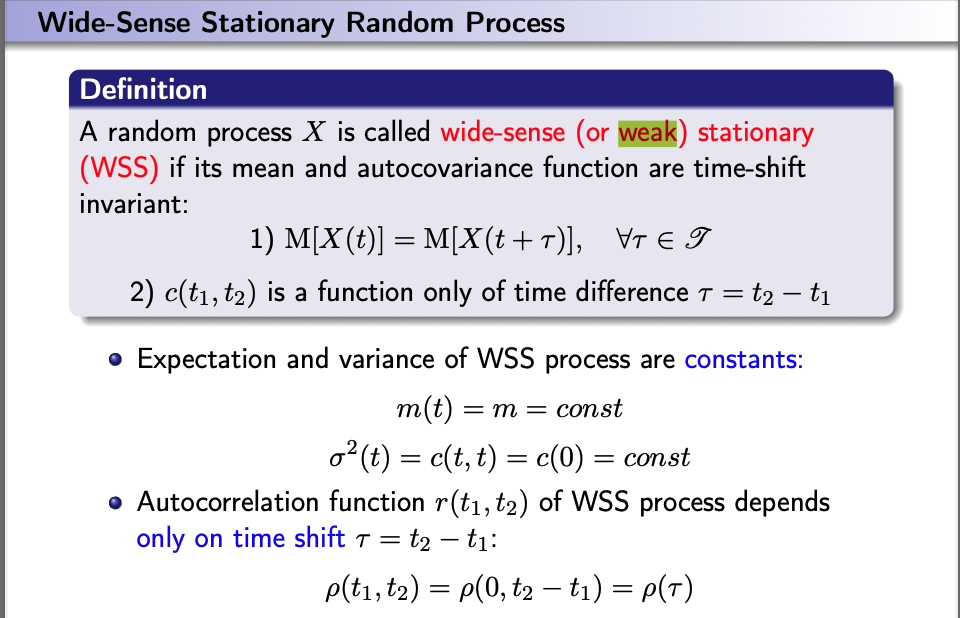

Процесс не является слабо стационарным, так как дисперсия не постоянна, а ковариация зависит не только от разницы времени, но и от времени.

Согласно центральной предельной теореме, сумма любых случайных величин будет распределена по Гауссу (нормально)

Процесс со стационарными приращениями – процесс, для которого за любые одинаковые t1-t0 времени его Приращения распределены одинаково.
Из стационарности приращений не следует стационарность 

Процесс со стационарными независимыми инкрементами (SII-процесс) – это интегралл от IID-процесса (например, белый шум)

SII процесс не может быть стационарным процессом.

**Процесс подсчета (Counting process)**
произвольный процесс с не-негативными целочисленными неубывающими значениями

**Процесс подсчета Бернулли (Bernulli counting process)**
Процесс подсчета Бернулли –  IID (independent and identically distributed) процесс

**Пуассоновский процесс (Poisson process)** – CII процесс, для которого за каждый промежуток времени прирост (arrivals) распределен по распределению Пуассона
(распределение Пуассона – то же, что и биномиальное распределение, только кол-во n -> inf (велика), вероятность прироста p -> inf.m (мала)



---



# Программная часть

## Библиотеки и получение Гауссова процесса

In [200]:
import matplotlib.pyplot as plt 
from scipy import integrate
import pandas as pd
import numpy as np
from sympy import *
init_printing()
import math
import seaborn as sn
from scipy import stats
import statsmodels

In [201]:
time_length = 500
number_of_processes = 100
norm_mu = 0.0
norm_sigma = 1.0

In [202]:
# Получение Гауссова процесса (ksi)
ksi = []
for i in range(number_of_processes):
  ksi.append(np.random.normal(norm_mu, norm_sigma, size=time_length))

In [203]:
#np.random.normal?

## Графики Гауссовых процессов

 Для удобсва сокращаем общее время *time_lengt* на коэффициент *size_devider*

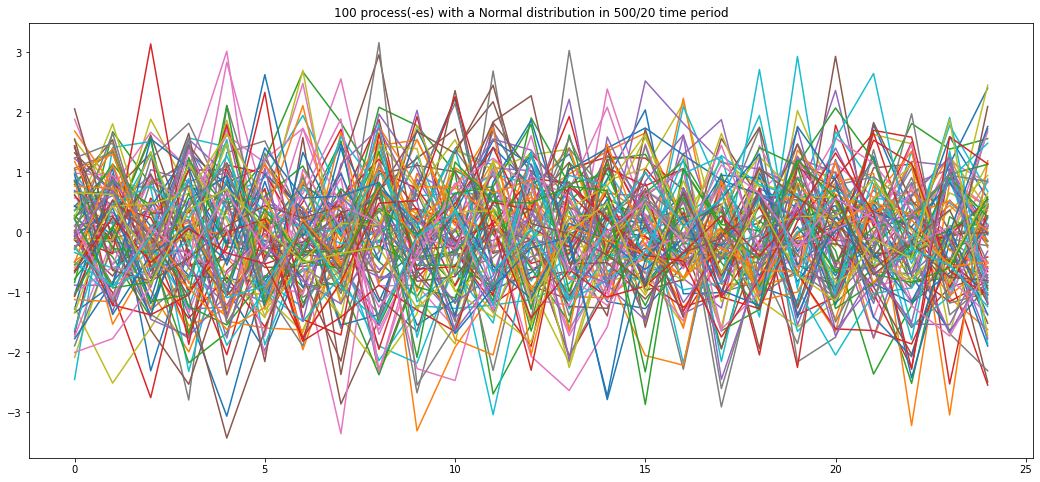

In [204]:
tmp = []
size_devider = 20

plt.figure(figsize=(18,8))
plt.title(str(number_of_processes) + " process(-es) with a Normal distribution in " + str(time_length) + "/" + str(size_devider) + " time period")

for i in range(number_of_processes):
  plt.plot((ksi[i])[:time_length//size_devider],label=str("Bernulli process "+str(i+1)))
#plt.legend();

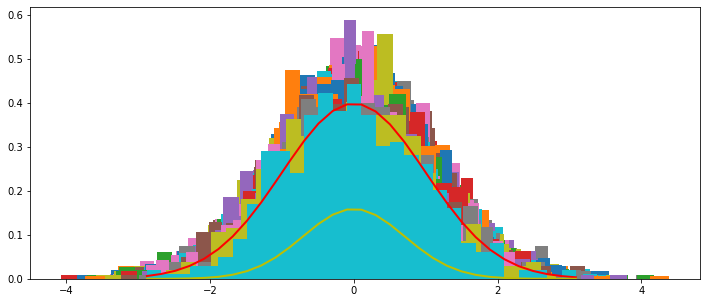

In [205]:

 # mean and standard deviation
# for i in range(number_of_processes):
#   s = ksi[i]
#   count, bins, ignored = plt.hist(s, 30, density=True, label = ("attained normal distribution" + str(i)))
#   plt.show();

plt.figure(figsize=(12,5))
for i in range(number_of_processes):
  s = ksi[i]
  count, bins, ignored = plt.hist(s, 30, density=True, label = ("attained normal distribution" + str(i)))
plt.plot(bins, 1/(norm_sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - norm_mu)**2 / (2 * norm_sigma**2) ),linewidth=2, color='r', label = "theoretical normal distribution")
plt.plot(bins, pow(1/(norm_sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - norm_mu)**2 / (2 * norm_sigma**2) ),2),linewidth=2, color='y', label = "theoretical sqaured normal distribution")

#plt.legend()
plt.show();

In [206]:
# # mean and standard deviation
# for i in range(number_of_processes):
#   s = mean(ksi)
#   plt.figure()
#   count, bins, ignored = plt.hist(s, 30, density=True, label = ("attained normal distribution" + str(i)))
#   plt.show();

# plt.plot(bins, 1/(norm_sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - norm_mu)**2 / (2 * norm_sigma**2) ),linewidth=2, color='r', label = "theoretical normal distribution")
# plt.plot(bins, pow(1/(norm_sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - norm_mu)**2 / (2 * norm_sigma**2) ),2),linewidth=2, color='y', label = "theoretical sqaured normal distribution")

# plt.legend()
# plt.show();

## Получение исследуемого процесса N

N - процесс расчета среднего значения квадрата нормального процесса (в задании назван X(t))

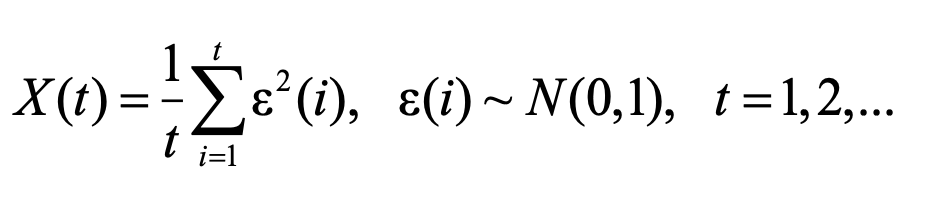

In [207]:
# #Основной способ получения процесса

# N = []
# tmp = []
# for i in range(number_of_processes):
#   for j in range(time_length):
#     tmp.append((np.sum(ksi[i][:j]**2))/j)
#   N.append(tmp)
#   tmp=[]
# x = range(len(ksi))
# plt.figure(figsize=(18,8))
# plt.title("Mean square value of a Gaussian process with m = " + str(norm_mu) + ", standard deviation = "+ str(norm_sigma))
# for i in range(number_of_processes):
#   plt.plot(range(time_length), N[i], label=str("process "+str(i+1)))

# plt.legend();

In [208]:
Normal_process = np.array(ksi)

In [209]:
# Проверочный способ получения процесса
# N = []
# tmp = np.array([])
# for i in range(number_of_processes):
#   for j in range(time_length):
#     tmp = np.append(tmp, np.sum(pow(Normal_process[i,:j],2))/j)
#   N.append(tmp)
#   tmp = np.array([])

In [210]:
#Проверочный способ получения процесса
N = []
tmp = np.array([])
for i in range(number_of_processes):
  for j in range(time_length):
    tmp = np.append(tmp, np.sum(Normal_process[i,:j]**2/j))
  N.append(tmp)
  tmp = np.array([])

## Исследование полученного процесса N

### График процессов

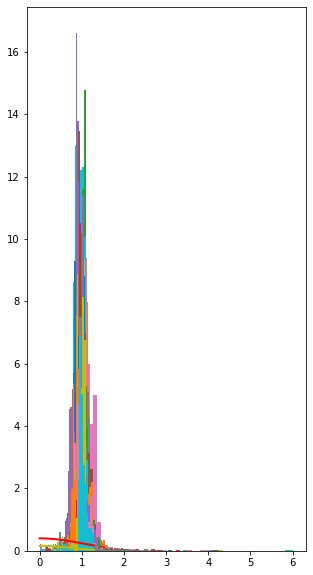

In [211]:
 # mean and standard deviation
plt.figure(figsize=(5,10))
for i in range(number_of_processes):
  s = N[i]
  count, bins, ignored = plt.hist(s, 30, density=True, label = ("attained normal distribution" + str(i)))
plt.plot(bins, 1/(norm_sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - norm_mu)**2 / (2 * norm_sigma**2) ),linewidth=2, color='r', label = "theoretical normal distribution")
plt.plot(bins, pow(1/(norm_sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - norm_mu)**2 / (2 * norm_sigma**2) ),2),linewidth=2, color='y', label = "theoretical sqaured normal distribution")

#plt.legend()
plt.show();

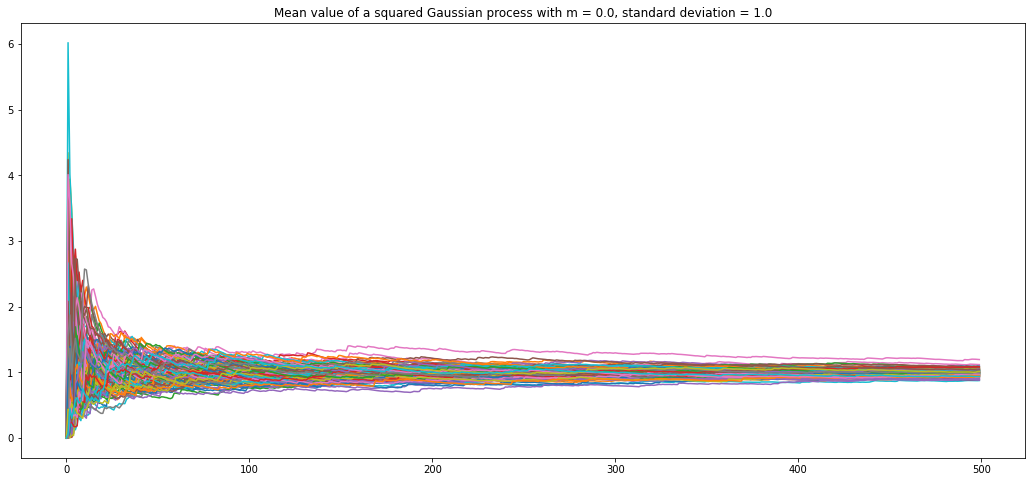

In [212]:
x = range(len(ksi))
plt.figure(figsize=(18,8))
plt.title("Mean value of a squared Gaussian process with m = " + str(norm_mu) + ", standard deviation = "+ str(norm_sigma))
for i in range(number_of_processes):
  plt.plot(range(time_length), N[i], label=str("process "+str(i+1)))

#plt.legend();

### Проверочный способ получения процесса

In [213]:

# #Проверочный способ получения процесса
# N = []
# tmp = np.array([])
# for i in range(number_of_processes):
#   for j in range(time_length):
#     tmp = np.append(tmp, np.sum(pow(Normal_process[i,:j],2)/j))
#   N.append(tmp)
#   tmp = np.array([])

# x = range(len(ksi))
# plt.figure(figsize=(18,8))
# plt.title("Mean square value of a Gaussian process with m = " + str(norm_mu) + ", standard deviation = "+ str(norm_sigma))
# for i in range(number_of_processes):
#   plt.plot(range(time_length), N[i], label=str("process "+str(i+1)))

# plt.legend();

### Получение среднего ансамбля процессов

In [214]:
npN = np.array(N)

In [215]:
mean_N = np.array([])
for i in range(time_length):
  mean_N = np.append(mean_N, npN[:,i].mean())

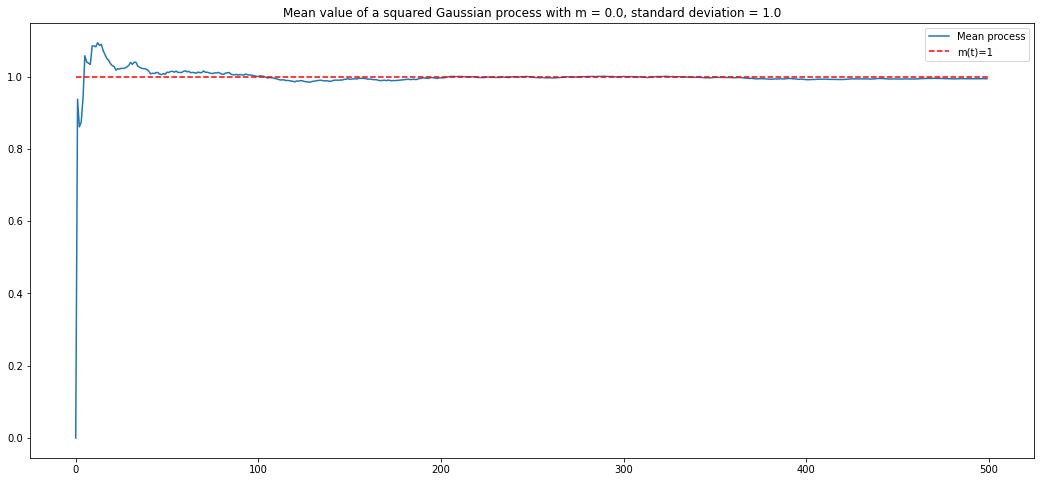

In [216]:
x = range(len(ksi))
plt.figure(figsize=(18,8))
plt.title("Mean value of a squared Gaussian process with m = " + str(norm_mu) + ", standard deviation = "+ str(norm_sigma))
plt.plot(range(len(mean_N)), mean_N, label=str("Mean process"))
plt.plot([0,len(mean_N)], [1,1], 'r--', label=str("m(t)=1"))
#plt.plot([0,len(mean_N)], [0,0], '--', label=str("theoretical m(t)=0"))

plt.legend();

### Расчет стандартного отклонения ансамбля процессов
(стандартное отклонение между различными процессами ансамбля)

In [217]:
# расчет стандартного отклонения ансамбля процессов
std_N_ans = np.array([])
for i in range(time_length):
  std_N_ans = np.append(std_N_ans, npN[:,i].std())

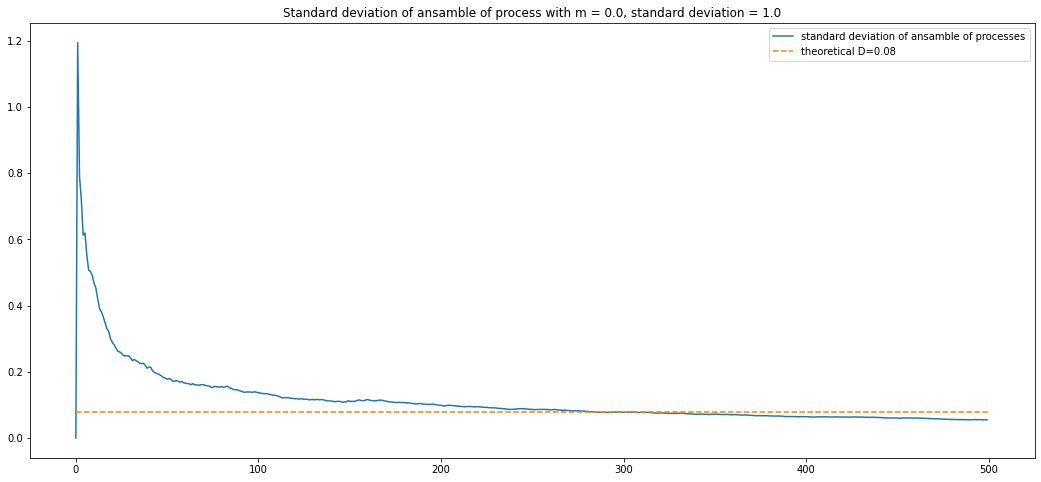

In [218]:
x = range(len(ksi))
plt.figure(figsize=(18,8))
plt.title("Standard deviation of ansamble of process with m = " + str(norm_mu) + ", standard deviation = "+ str(norm_sigma))
plt.plot(range(time_length), std_N_ans, label=str("standard deviation of ansamble of processes"))

plt.plot([0,time_length], [1/(4*math.pi),1/(4*math.pi)], '--', label=str("theoretical D=" + str(round(1/(4*math.pi),2))))

plt.legend();

### Получение усредненного по ансамблю стандартного отклонения процесса

In [219]:
std_N = np.array([])
tmp = np.array([])
for i in range(time_length):
  for j in range(number_of_processes):
    tmp = np.append(tmp,npN[j,i])

  std_N = np.append(std_N,tmp.mean())

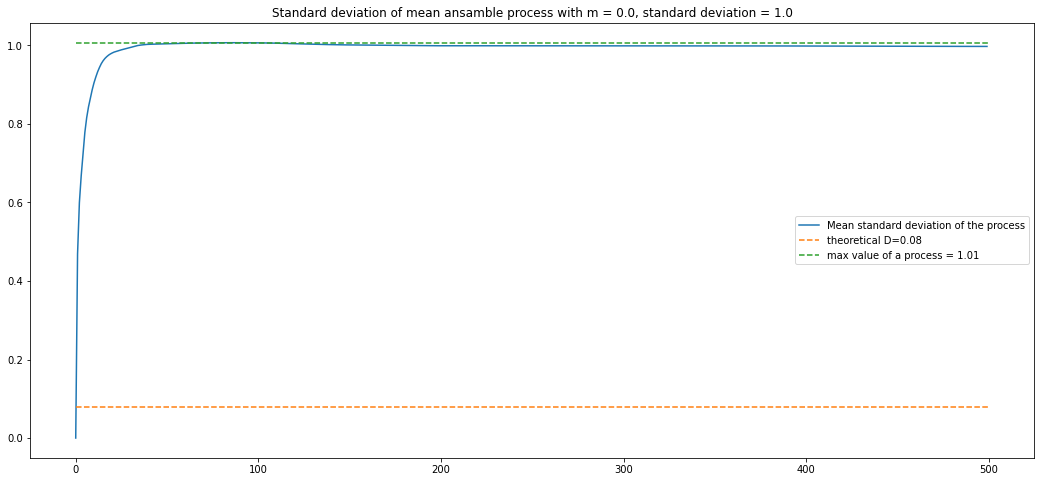

In [220]:
x = range(len(ksi))
plt.figure(figsize=(18,8))
plt.title("Standard deviation of mean ansamble process with m = " + str(norm_mu) + ", standard deviation = "+ str(norm_sigma))
plt.plot(range(time_length), std_N, label=str("Mean standard deviation of the process"))

plt.plot([0,time_length], [1/(4*math.pi),1/(4*math.pi)], '--', label=str("theoretical D=" + str(round(1/(4*math.pi),2))))
plt.plot([0,time_length], [std_N.max(),std_N.max()], '--', label=str("max value of a process = "+ str(round(std_N.max(),2))))

plt.legend();

### Оценка автоковариационной и автокорреляционной функций

#### Визуализация Ковариационной матрицы для процесса в течение первых 100 и последних 100 единиц времени 

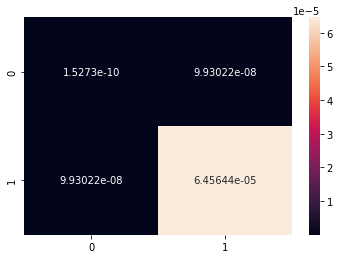

In [221]:
N_cov = np.cov(mean_N[-100:],mean_N[:100])
covMatrix = np.cov(N_cov)
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

#### Визуализация Ковариационной матрицы для всего процесса с(t,t) 

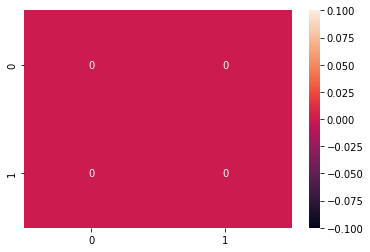

In [222]:
N_cov = np.cov(mean_N,mean_N)
covMatrix = np.cov(N_cov)
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

In [223]:
pdN = pd.DataFrame(npN)


In [224]:
# plt.figure(figsize=(15,15))
# covariance_mtrx = pdN.cov();
# covMatrix = np.cov(covariance_mtrx)
# sn.heatmap(covMatrix, annot=True, fmt='g')
# plt.show()

In [225]:
npN[:3,:4]

array([[0.        , 1.63670452, 1.29057936, 0.86362599],
       [0.        , 0.19374522, 0.11331456, 0.38597617],
       [0.        , 0.69804494, 1.75754743, 1.38270158]])

In [226]:
# covariance_mtrx.max()
def autocovariance_function(X1, X2, mean_value1=1, mean_value2=1):
  return (np.mean((X1-mean_value1)*(X2-mean_value2)))

In [227]:
# autocovariance_function(npN[:,1],npN[:,10],1,1)

#### Построить графики зависимостей оценки автоковариационной функции c() от временного лага  и среднего значения   от t. 

In [294]:
cov_init_time = 100
autocov = []
for i in range(time_length-100):
  autocov.append(autocovariance_function(npN[:,100].mean(),npN[:,100+i].mean()))

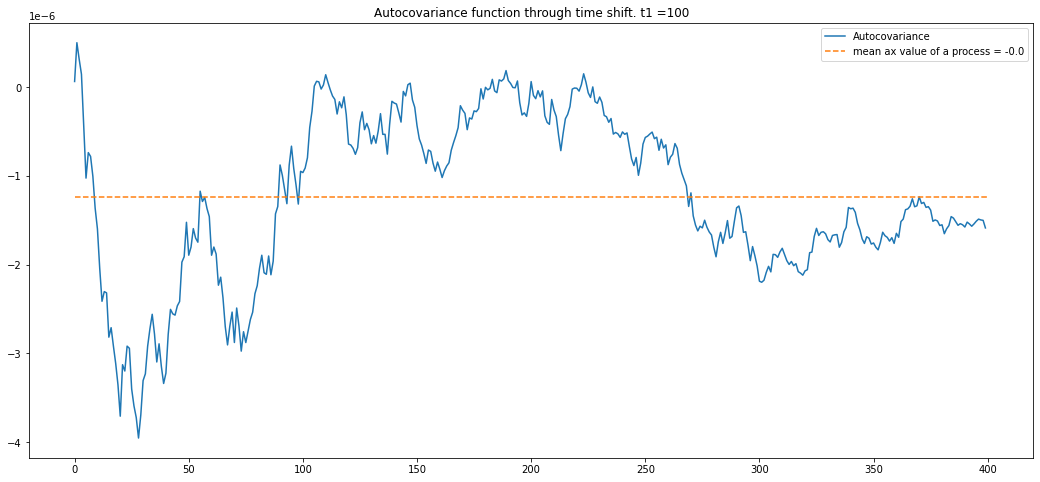

In [296]:
x = range(len(ksi))
plt.figure(figsize=(18,8))
plt.title("Autocovariance function through time shift. t1 ="+ str(cov_init_time))
plt.plot(range(len(autocov)), autocov, label=str("Autocovariance"))

# plt.plot([0,time_length], [1/(4*math.pi),1/(4*math.pi)], '--', label=str("theoretical D=" + str(round(1/(4*math.pi),2))))
# plt.plot([0,time_length], [std_N.max(),std_N.max()], '--', label=str("max value of a process = "+ str(round(std_N.max(),2))))
plt.plot([0,len(autocov)], [np.mean(autocov),np.mean(autocov)], '--', label=str("mean ax value of a process = "+ str(round(np.mean(autocov),4))))

plt.legend();

In [298]:
cov_init_time = 100
autocov = []
for i in range(time_length-100):
  for j in range(i):
    tmp.append(autocovariance_function(npN[:,100].mean(),npN[:,100+j].mean()))
  autocov.append(np.sum(tmp)/i)
  tmp = []

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


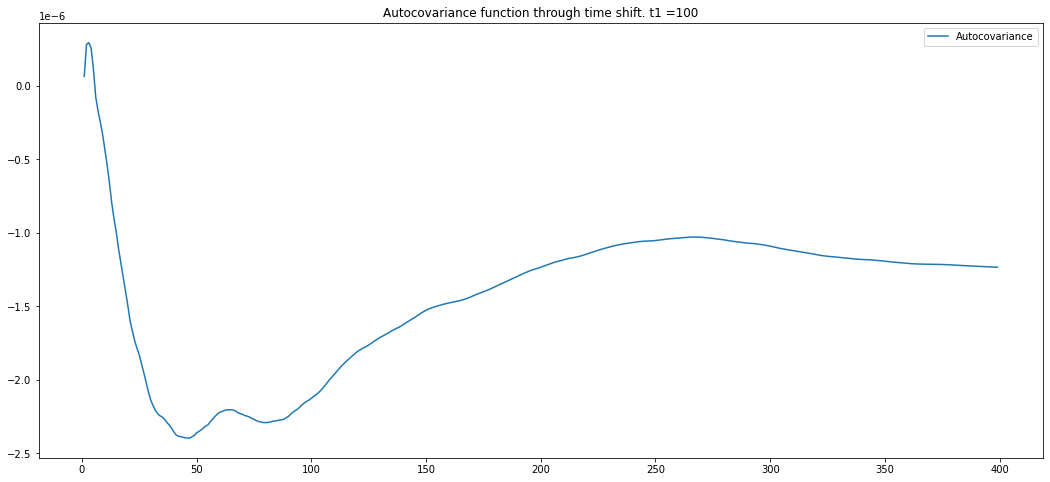

In [300]:
x = range(len(ksi))
plt.figure(figsize=(18,8))
plt.title("Autocovariance function through time shift. t1 ="+ str(cov_init_time))
plt.plot(range(len(autocov)), autocov, label=str("Autocovariance"))

# plt.plot([0,time_length], [1/(4*math.pi),1/(4*math.pi)], '--', label=str("theoretical D=" + str(round(1/(4*math.pi),2))))
# plt.plot([0,time_length], [std_N.max(),std_N.max()], '--', label=str("max value of a process = "+ str(round(std_N.max(),2))))
# plt.plot([0,len(autocov)], [np.mean(autocov),np.mean(autocov)], '--', label=str("max value of a process = "+ str(round(np.mean(autocov),4))))

plt.legend();

### Оценка автокорреляции

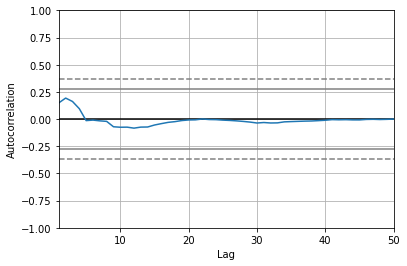

In [230]:
#Autocorrelation
x = pd.plotting.autocorrelation_plot(mean_N[:50])
  
# ploting the Curve
x.plot()

# Display
plt.show()

### Оценка одномерных распределений значений процесса по ансамблю реализаций для произвольных моментов времени t1, t2

In [234]:
t1 = time_length-1
t2 = time_length//10
distr_time = [t1,t2]

distr = []

distr.append(npN[:,t1])
distr.append(npN[:,t2])

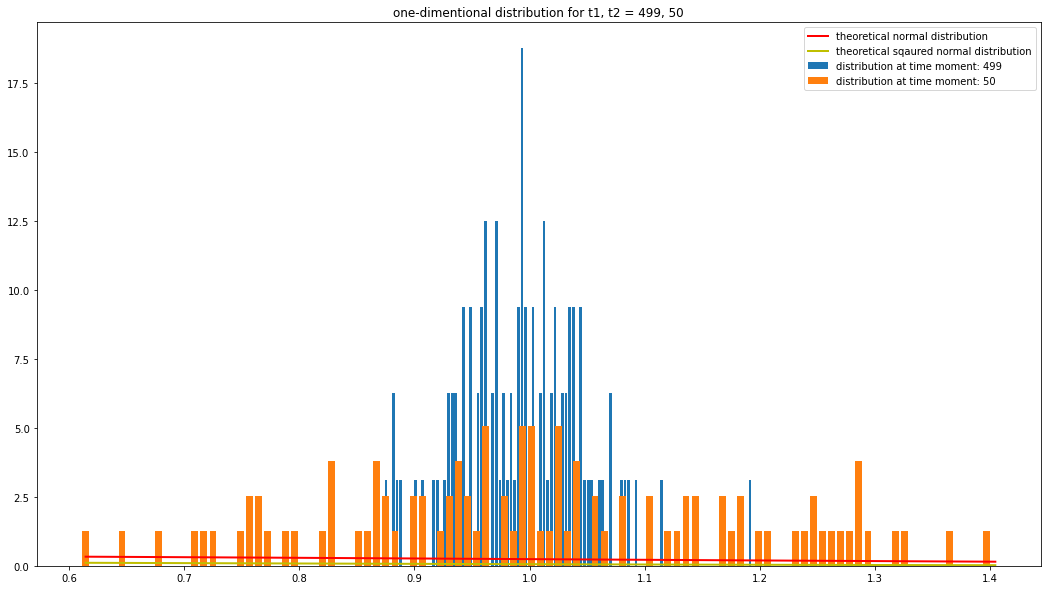

In [235]:
plt.figure(figsize=(18,10))
for i in range(len(distr)):
  s = distr[i]
  count, bins, ignored = plt.hist(s, 100, density=True, label = ("distribution at time moment: " + str(distr_time[i])),align='left',rwidth=0.75)
plt.plot(bins, 1/(norm_sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - norm_mu)**2 / (2 * norm_sigma**2) ),linewidth=2, color='r', label = "theoretical normal distribution")
plt.plot(bins, pow(1/(norm_sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - norm_mu)**2 / (2 * norm_sigma**2) ),2),linewidth=2, color='y', label = "theoretical sqaured normal distribution")
plt.title("one-dimentional distribution for t1, t2 = " + str(t1)+ ", " + str(t2))
plt.legend()
plt.show();

### Тест Харке-Бера
Проверка ошибки наблюдений на нормальность посредством сверки их третьего момента (асимметрия) и четвёртого момента (эксцесс) с моментами нормального распределения, у которого 
S=0
K=3

In [177]:
jarque_bera_test = []
for i in range(len(distr)):
  jarque_bera_test.append(stats.jarque_bera(distr[i]))

Уточнение в документации: 
Note that this test only works for a large enough number of data samples (>2000) as the test statistic asymptotically has a Chi-squared distribution with 2 degrees of freedom.

In [236]:
print ("Jarque-Bera test p-value 1: ", jarque_bera_test[0][1])
print ("Jarque-Bera test p-value 2: ", jarque_bera_test[1][1])

Jarque-Bera test p-value 1:  0.004614552458953147
Jarque-Bera test p-value 2:  0.09809835816272283


In [179]:
jarque_bera_test

Так как p-value теста Харке-Бера больше 0.5, гипотеза о существенном отличии от нормального распределения отвергается. Распределение в моменты времени t1 и t2 близко к нормальному.

### Проверка случайных величин X(t1) и X(t2) на одинаковое распределение

In [180]:
stats.chisquare(distr[0],distr[1],axis=None)

Power_divergenceResult(statistic=4.318057207009452, pvalue=1.0)

This test is invalid when the observed or expected frequencies in each category are too small. A typical rule is that all of the observed and expected frequencies should be at least 5. According to [3], the total number of samples is recommended to be greater than 13, otherwise exact tests (such as Barnard’s Exact test) should be used because they do not overreject.

### Привести графики нескольких реализаций приращений процесса 
X(t) = X(t)–X(t–1). 

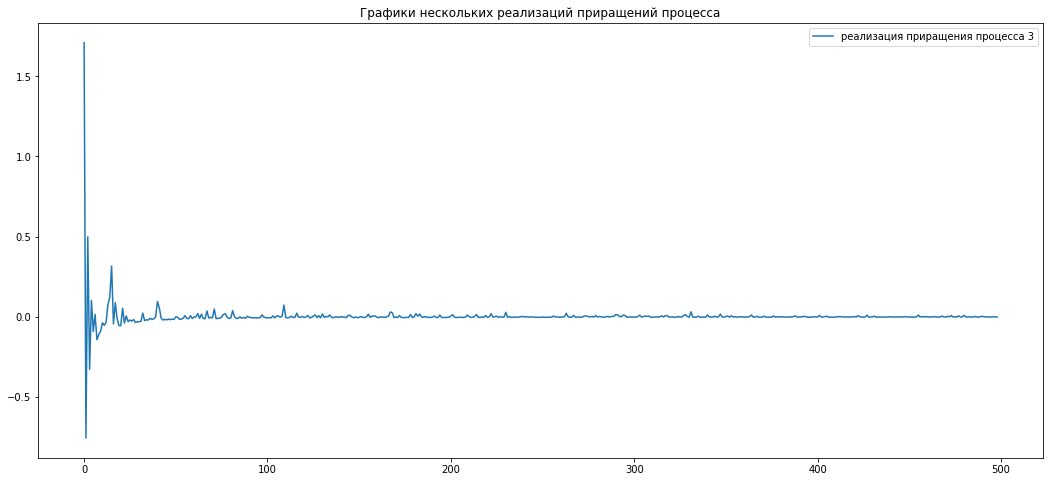

In [185]:
plt.figure(figsize=(18,8))
plt.title("Графики нескольких реализаций приращений процесса")

#for j in range(3):
delta_X = []
for i in range(time_length-1):
  delta_X.append(N[15][i+1]-N[15][i])
plt.plot((delta_X)[:time_length],label=str("реализация приращения процесса 3"))
plt.legend();

In [186]:
contingency = pd.crosstab(distr[0], distr[1])

In [ ]:
plt.figure(figsize=(20,20))
sn.heatmap(contingency, annot=True, vmin=-1, vmax=2)
plt.show()

### Вывод об эргодичности процесса X(t) по дисперсии и автоковариационной функции. Сравнить полученный результат с теоретическим.

In [278]:
from pandas.io.formats.format import TextAdjustment
tau = 10

Ytt = []

for i in range(time_length-tau):
  Ytt.append(autocovariance_function(npN[:,i].mean(),npN[:,i+tau].mean(),npN[:,:].mean(),npN[:,:].mean()))

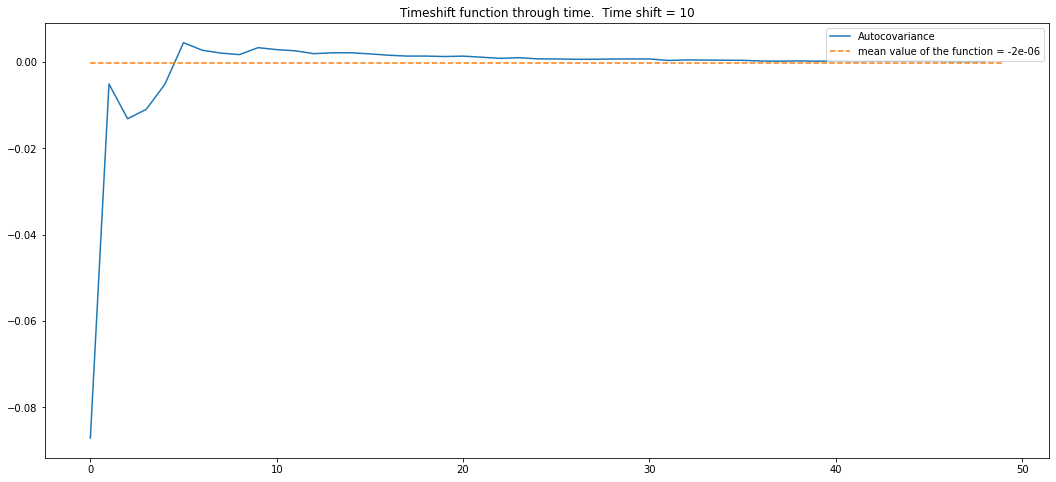

In [284]:
x = range(len(ksi))
plt.figure(figsize=(18,8))
plt.title("Timeshift function through time.  Time shift = " + str(tau))
plt.plot(range(len(Ytt)//10), Ytt[:len(Ytt)//10], label=str("Autocovariance"))

# plt.plot([0,time_length], [1/(4*math.pi),1/(4*math.pi)], '--', label=str("theoretical D=" + str(round(1/(4*math.pi),2))))
# plt.plot([0,time_length], [std_N.max(),std_N.max()], '--', label=str("max value of a process = "+ str(round(std_N.max(),2))))
plt.plot([0,len(Ytt)//10], [np.mean(Ytt),np.mean(Ytt)], '--', label=str("mean value of the function = "+ str(round(np.mean(autocov),6))))

plt.legend();

# Оценивание характеристик процесса по одной реализации

In [120]:
time_length = 3000
number_of_processes = 1
norm_mu = 0.0
norm_sigma = 1.0

### Получение процесса

In [121]:
# Получение Гауссова процесса (ksi)
ksi = []
for i in range(number_of_processes):
  ksi.append(np.random.normal(norm_mu, norm_sigma, size=time_length))

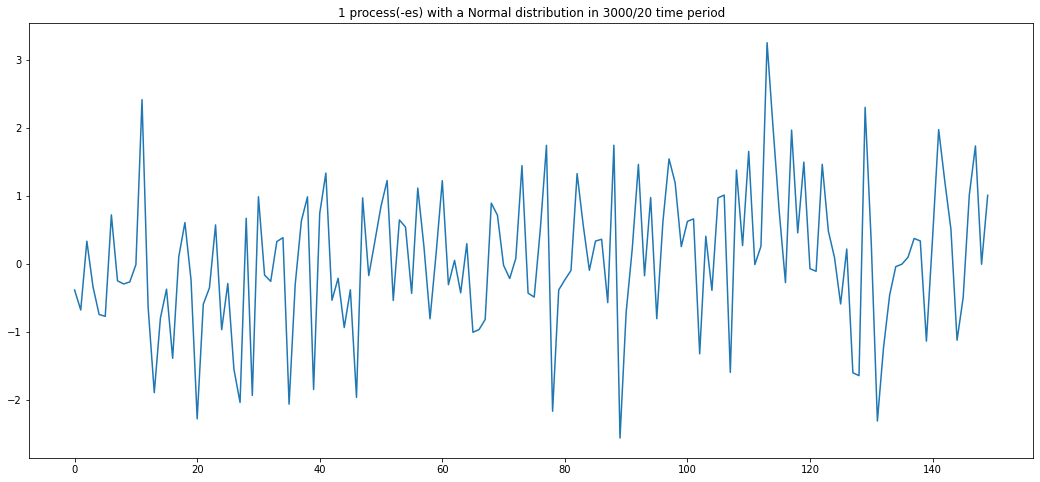

In [122]:
tmp = []
size_devider = 20

plt.figure(figsize=(18,8))
plt.title(str(number_of_processes) + " process(-es) with a Normal distribution in " + str(time_length) + "/" + str(size_devider) + " time period")

for i in range(number_of_processes):
  plt.plot((ksi[i])[:time_length//size_devider],label=str("Bernulli process "+str(i+1)))
#plt.legend();

График нормального распределения, лежащего в основе исследуемого процесса

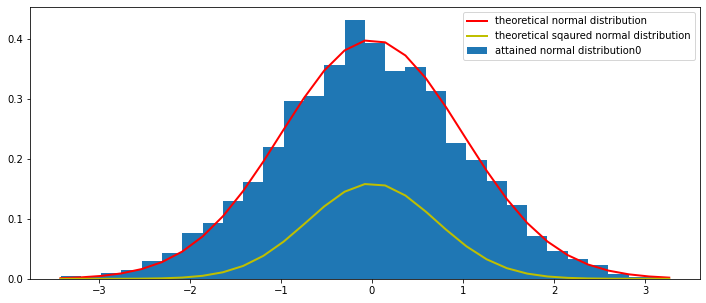

In [123]:
# mean and standard deviation
# for i in range(number_of_processes):
#   s = ksi[i]
#   count, bins, ignored = plt.hist(s, 30, density=True, label = ("attained normal distribution" + str(i)))
#   plt.show();

plt.figure(figsize=(12,5))
for i in range(number_of_processes):
  s = ksi[i]
  count, bins, ignored = plt.hist(s, 30, density=True, label = ("attained normal distribution" + str(i)))
plt.plot(bins, 1/(norm_sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - norm_mu)**2 / (2 * norm_sigma**2) ),linewidth=2, color='r', label = "theoretical normal distribution")
plt.plot(bins, pow(1/(norm_sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - norm_mu)**2 / (2 * norm_sigma**2) ),2),linewidth=2, color='y', label = "theoretical sqaured normal distribution")

plt.legend()
plt.show();

Получение целевого процесса

In [124]:
Normal_process = np.array(ksi)
N = []
tmp = np.array([])
for i in range(number_of_processes):
  for j in range(time_length):
    tmp = np.append(tmp, np.sum(Normal_process[i,:j]**2/j))
  N.append(tmp)
  tmp = np.array([])

### График процесса 

####График распределения в фиксированный момент времени

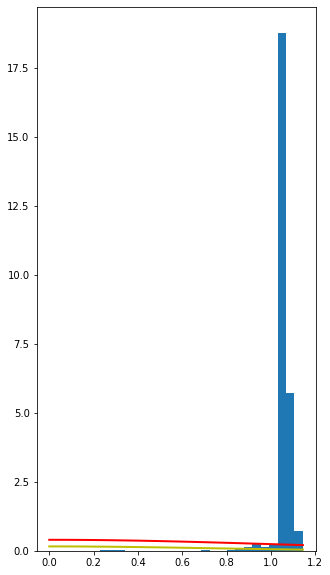

In [125]:
 # mean and standard deviation
plt.figure(figsize=(5,10))
for i in range(number_of_processes):
  s = N[i]
  count, bins, ignored = plt.hist(s, 30, density=True, label = ("attained normal distribution" + str(i)))
plt.plot(bins, 1/(norm_sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - norm_mu)**2 / (2 * norm_sigma**2) ),linewidth=2, color='r', label = "theoretical normal distribution")
plt.plot(bins, pow(1/(norm_sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - norm_mu)**2 / (2 * norm_sigma**2) ),2),linewidth=2, color='y', label = "theoretical sqaured normal distribution")

#plt.legend()
plt.show();

#### График процессов со временем

In [126]:
size_devider = 5

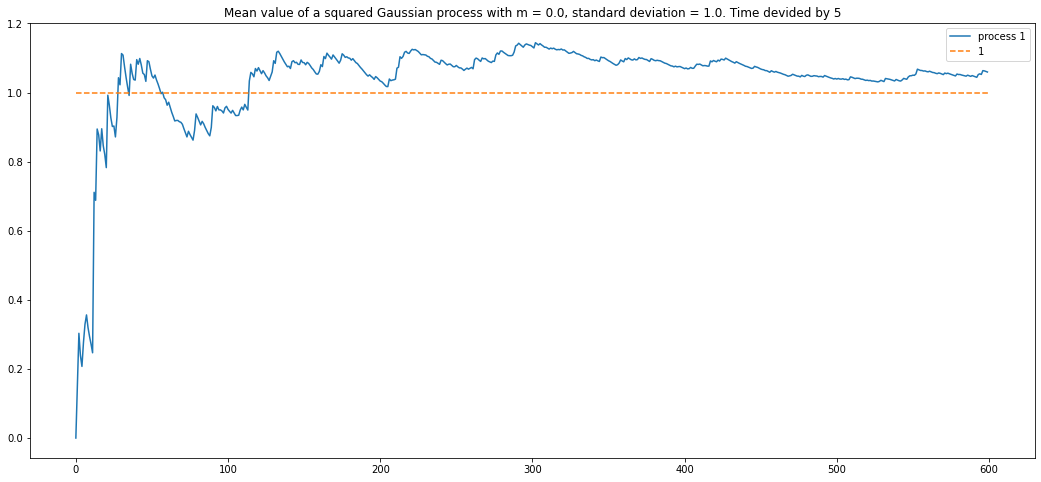

In [127]:
x = range(len(ksi))
plt.figure(figsize=(18,8))
plt.title("Mean value of a squared Gaussian process with m = " + str(norm_mu) + ", standard deviation = "+ str(norm_sigma) +". Time devided by " + str(size_devider))
for i in range(number_of_processes):
  plt.plot(range(time_length//size_devider), N[i][:time_length//size_devider], label=str("process "+str(i+1)))
plt.plot([0,time_length//size_devider], [1,1], '--', label=str("1"))
plt.legend();

In [128]:
npN = np.array(N)

In [129]:
time_shift_mean_function = []
for i in range(time_length):
  time_shift_mean_function.append(npN[0,:i].mean());

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [130]:
size_devider = 5

#### график зависимости среднего (по времени) от ширины интервала усреднения (длины временного ряда)

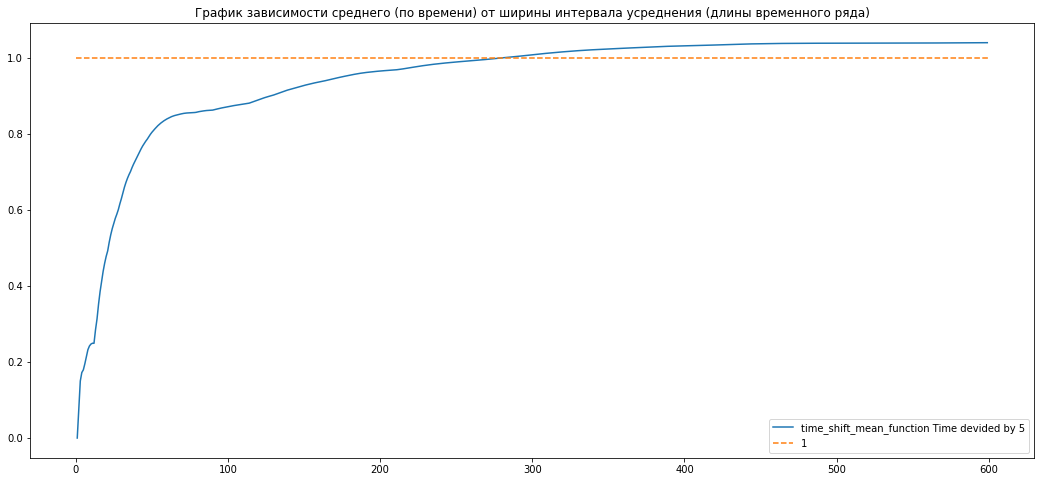

In [131]:
x = range(len(ksi))
plt.figure(figsize=(18,8))

plt.title("График зависимости среднего (по времени) от ширины интервала усреднения (длины временного ряда)")

plt.plot(range(time_length//size_devider), time_shift_mean_function[:time_length//size_devider], label=str("time_shift_mean_function "+ "Time devided by " + str(size_devider)))

plt.plot([0,time_length//size_devider], [1,1], '--', label=str("1"))
plt.legend();

#### График зависимости среднеквадратического отклонения (по времени) от ширины интервала усреднения (длины временного ряда).

In [132]:
time_shift_std_function = []
for i in range(time_length):
  time_shift_std_function.append(npN[0,:i].std());

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [133]:
size_devider = 5

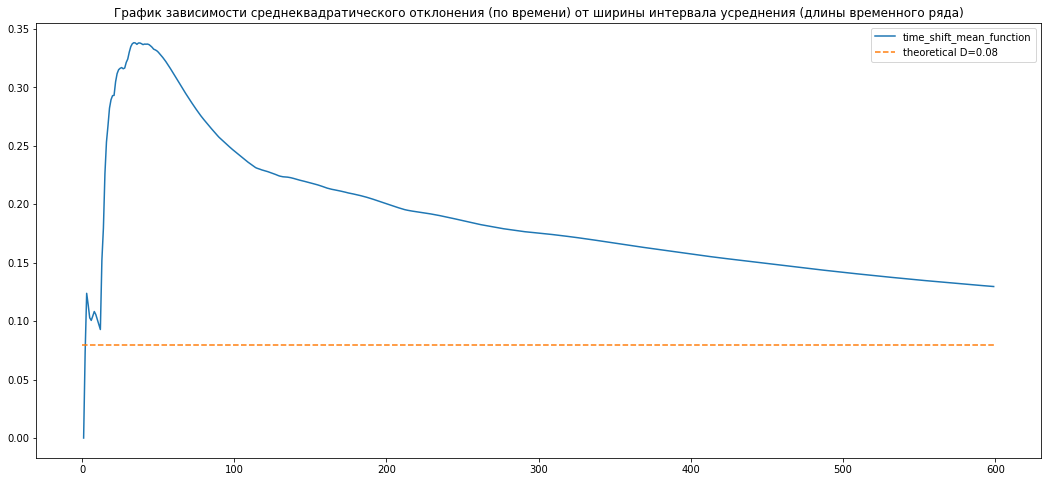

In [134]:
x = range(len(ksi))
plt.figure(figsize=(18,8))

plt.title("График зависимости среднеквадратического отклонения (по времени) от ширины интервала усреднения (длины временного ряда)")

plt.plot(range(time_length//size_devider), time_shift_std_function[:time_length//size_devider], label=str("time_shift_mean_function"))

plt.plot([0,time_length//size_devider], [1/(4*math.pi),1/(4*math.pi)], '--', label=str("theoretical D=" + str(round(1/(4*math.pi),2))))
plt.legend();

### График зависимости автоковариационной функции от временного лага

In [135]:
# N_cov = np.cov(npN,npN)

In [136]:
# #Ковариационная матрица в виде тепловой карты
# covMatrix = np.cov(N_cov)
# sn.heatmap(covMatrix, annot=True, fmt='g')
# plt.show()

In [137]:
N_cov = []
for i in range(time_length):
  N_cov.append(np.cov(npN[:,time_length-1],npN[:,i]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Degrees of freedom <= 0 for slice
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [138]:
pdN = pd.DataFrame(npN)

In [139]:
# covariance_mtrx = pdN.cov();
# covMatrix = np.cov(covariance_mtrx)
# sn.heatmap(covMatrix, annot=True, fmt='g')
# plt.show()

In [140]:
# x = range(len(ksi))
# plt.figure(figsize=(18,8))

# plt.title("")

# plt.plot(range(time_length), covariance_mtrx.mean(), label=str("time_shift_mean_function"))

# plt.plot([0,time_length], [1/(4*math.pi),1/(4*math.pi)], '--', label=str("theoretical D=" + str(round(1/(4*math.pi),2))))
# plt.plot([0,time_length], [-1/(4*math.pi),-1/(4*math.pi)], '--', label=str(-round(1/(4*math.pi),2)))
# plt.legend();

In [141]:
cov_init_time = 100
autocov = []
for i in range(time_length//5):
  autocov.append(autocovariance_function(npN[:,100].mean(),npN[:,100+i].mean()))
x = range(len(ksi))

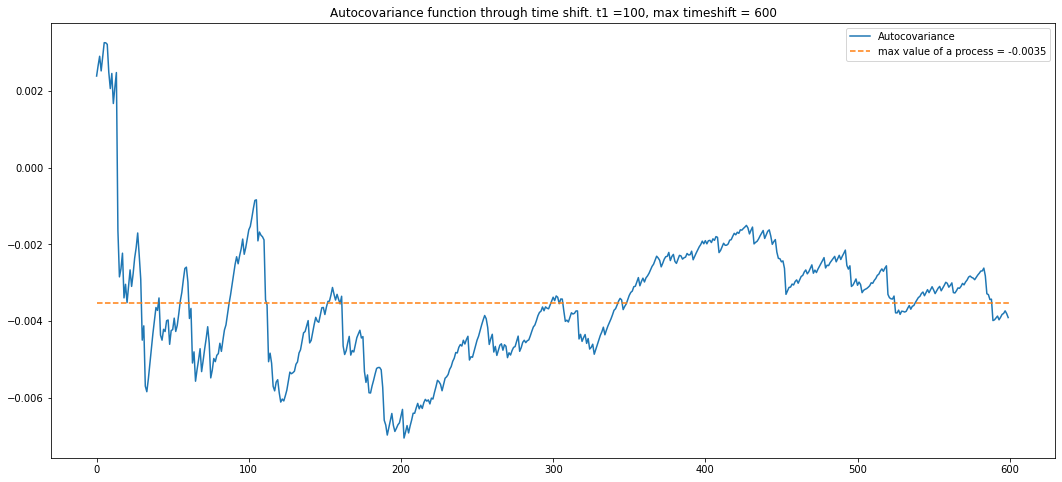

In [142]:
plt.figure(figsize=(18,8))
plt.title("Autocovariance function through time shift. t1 ="+ str(cov_init_time) + ", max timeshift = " + str(time_length//5))
plt.plot(range(len(autocov)), autocov, label=str("Autocovariance"))

# plt.plot([0,time_length], [1/(4*math.pi),1/(4*math.pi)], '--', label=str("theoretical D=" + str(round(1/(4*math.pi),2))))
# plt.plot([0,time_length], [std_N.max(),std_N.max()], '--', label=str("max value of a process = "+ str(round(std_N.max(),2))))
plt.plot([0,len(autocov)], [np.mean(autocov),np.mean(autocov)], '--', label=str("max value of a process = "+ str(round(np.mean(autocov),4))))

plt.legend();